In [19]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
from pandas.core.reshape.pivot import pivot


In [20]:
df = pd.read_csv("all_vacancy_data.csv")
df.head()

,Unnamed: 0,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


In [21]:
#Group by year
year_groupby = df.groupby(by='Year',as_index=True).agg({'VUDays':'mean', 'VTDays':'mean', 'TotalVAC':'mean', 'LGA': 'count'})#[['VUDays', 'VTDays', 'TotalVAC']].mean()
year_groupby = year_groupby.rename(columns= {'LGA':'Vacancy Count'})
year_groupby.head(30)

,VUDays,VTDays,TotalVAC,Vacancy Count
Year,,,,
2017,13.441606,16.868052,30.309657,3562
2018,17.285539,29.051966,46.337505,7351
2019,21.893207,34.134239,56.027446,7360
2020,18.509575,24.308855,42.818431,6945
2021,12.869671,15.323397,28.193068,2885


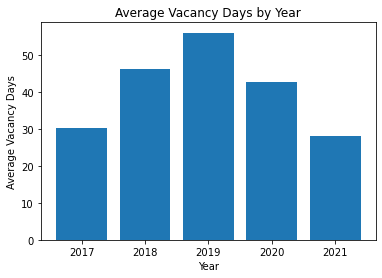

In [22]:
#Plotting
plt.bar(year_groupby.index, year_groupby['TotalVAC'])
plt.xlabel('Year')
plt.ylabel('Average Vacancy Days')
plt.title('Average Vacancy Days by Year')
plt.show()

In [23]:
#Group by month
months_groupby = df.groupby(by='Month',as_index=False).agg({'VUDays':'mean', 'VTDays':'mean', 'TotalVAC':'mean', 'LGA': 'count'})#[['VUDays', 'VTDays', 'TotalVAC']].mean()
months_groupby = months_groupby.rename(columns= {'LGA':'Vacancy Count'})
months_groupby.head()

,Month,VUDays,VTDays,TotalVAC,Vacancy Count
0,2017-07,11.617089,15.492089,27.109177,632
1,2017-08,13.576490,14.988728,28.565217,621
2,2017-09,14.102142,12.237232,26.339374,607
3,2017-10,14.374723,14.534368,28.909091,451
4,2017-11,13.397882,12.161876,25.559758,661


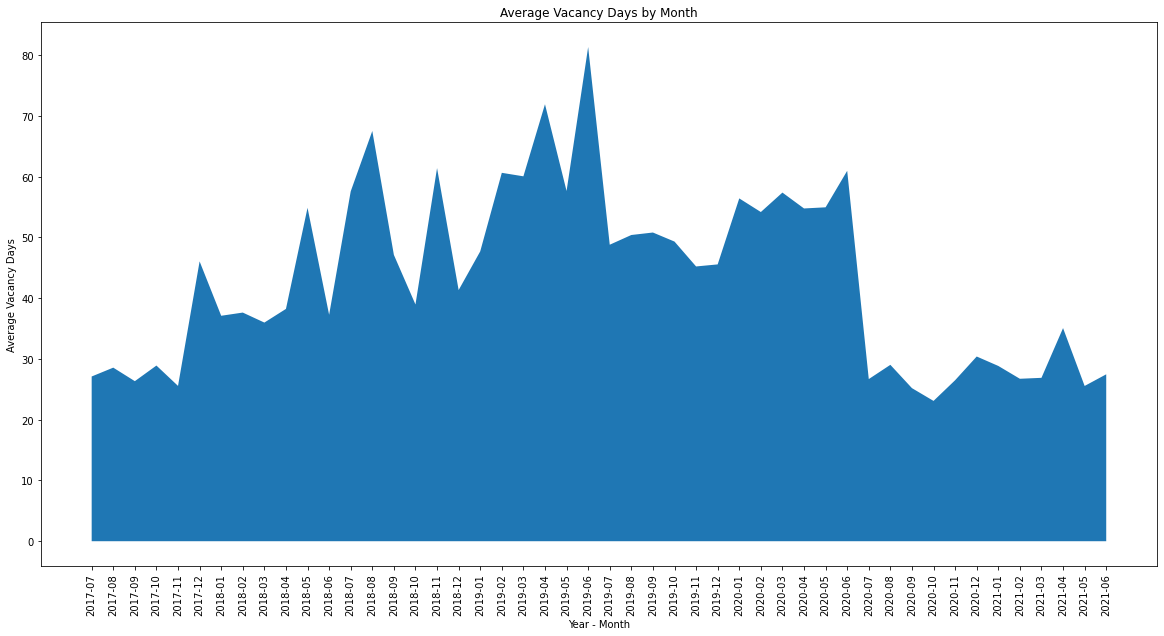

In [24]:
#Plotting
plt.figure(figsize=(20,10))
plt.fill_between(months_groupby['Month'], months_groupby['TotalVAC'])
plt.xlabel('Year - Month')
plt.ylabel('Average Vacancy Days')
plt.title('Average Vacancy Days by Month')
plt.xticks(rotation=90)
plt.show()

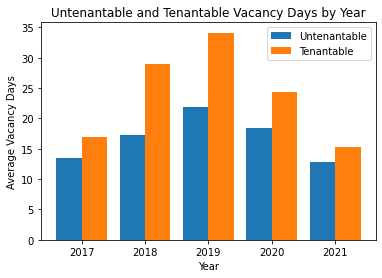

In [25]:
#Plotting
x_axis=np.arange(len(year_groupby.index))
plt.bar(x_axis - 0.2, year_groupby['VUDays'], 0.4, label = 'Untenantable')
plt.bar(x_axis + 0.2, year_groupby['VTDays'], 0.4, label = 'Tenantable')
plt.xticks(x_axis, year_groupby.index)
plt.xlabel('Year')
plt.ylabel('Average Vacancy Days')
plt.title('Untenantable and Tenantable Vacancy Days by Year')
plt.legend()
plt.show()


In [26]:
#Group by bedroom
rooms_groupby = df.groupby(by='Bedrooms',as_index=True)['TotalVAC'].mean()
rooms_groupby

Bedrooms
1    40.850624
2    46.886422
3    45.231746
4    42.663354
5    83.305882
6    23.000000
7    14.000000
Name: TotalVAC, dtype: float64

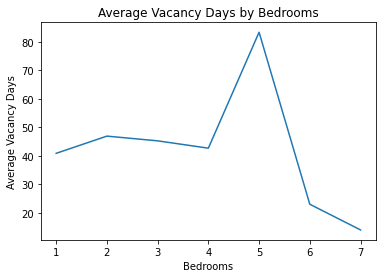

In [27]:
#Plotting
plt.plot(rooms_groupby.index, rooms_groupby.values)
plt.xlabel('Bedrooms')
plt.ylabel('Average Vacancy Days')
plt.title('Average Vacancy Days by Bedrooms')
plt.show()

Shows a clear downward trend with the increasing bedroom number, but 5 bedroom type shows diffrent. Lets investigate more.

In [28]:
#Group by rental unit type
type_groupby = df.groupby(by=['Bedrooms','RentalUnitDesc'],as_index=False)['TotalVAC'].mean()
#Create a pivot table of bedroom and rental unit type
bed_type = type_groupby.pivot(index='Bedrooms', columns='RentalUnitDesc', values='TotalVAC').reset_index()
bed_type.set_index('Bedrooms', inplace=True)
bed_type

RentalUnitDesc,Apartment,Attached Housing,Cluster Housing,Detached House,Dual Occupancy,Duplex,Senior Unit,Townhouse
Bedrooms,,,,,,,,
1,40.116512,41.811346,45.887755,37.897985,36.013333,39.306723,44.421263,NaN
2,46.903340,35.435996,47.219081,44.870185,58.436782,61.111702,50.492509,52.666667
3,33.985273,38.624811,39.946237,53.663884,63.400000,40.719403,37.108607,60.000000
4,33.463700,37.045045,40.043478,53.156969,38.923077,38.447368,28.959596,NaN
5,50.045455,18.750000,12.666667,131.691358,8.000000,37.000000,34.875000,NaN
6,7.666667,38.000000,NaN,29.142857,NaN,NaN,17.000000,NaN
7,14.000000,NaN,NaN,NaN,NaN,14.000000,NaN,NaN


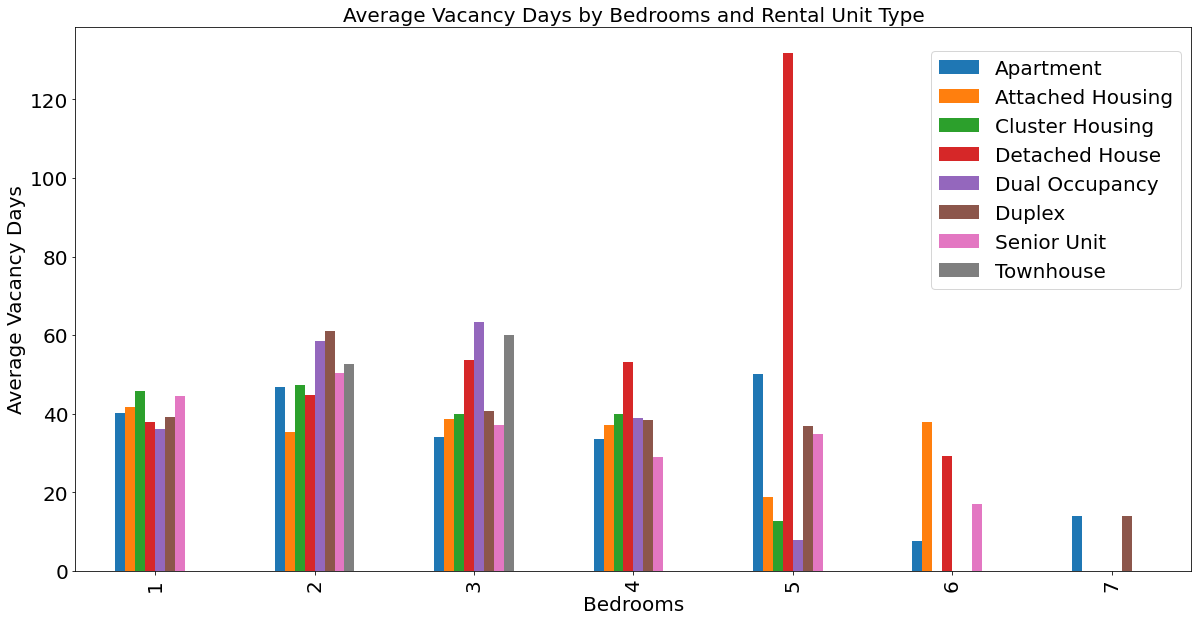

In [29]:
#Plotting
bed_type.plot.bar(figsize=(20,10), fontsize=20,linewidth=10)
plt.title('Average Vacancy Days by Bedrooms and Rental Unit Type', fontsize=20)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.5),fontsize=20)

plt.show()

5 Bedroom Detached House's Total Vacancy days count is weirdly high. Lets find the outliers.

In [30]:
#Filtering out the data for 5 bedroom Detached House
five_bed_df = df[df['Bedrooms'] == 5]
five_bed_detached = five_bed_df[five_bed_df['RentalUnitDesc'] == 'Detached House']

five_bed_detached_vdays = five_bed_detached['TotalVAC']
five_bed_detached_vdays


91        31
1193      33
1442      20
2537      11
3120      34
        ... 
23248      8
23843      2
24479     37
25996     21
26734    164
Name: TotalVAC, Length: 81, dtype: int64

In [31]:
# Calculate the IQR and 
# quantitatively determine if there are any potential outliers. 
def quartiles(df):
    quartiles = df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = df.loc[(df< lower_bound) | (df > upper_bound)]
    outliers.sort_values(inplace=True, ascending=False)
    if len(outliers) > 0:
        print(f'Potential outlier are: \n{outliers}')
    print("--------------------------------------------------")
    return

quartiles(five_bed_detached_vdays)

Potential outlier are: 
13838    7412
21461     326
12916     287
21753     188
26734     164
13754     124
12534     119
14398     103
21662      95
Name: TotalVAC, dtype: int64
--------------------------------------------------


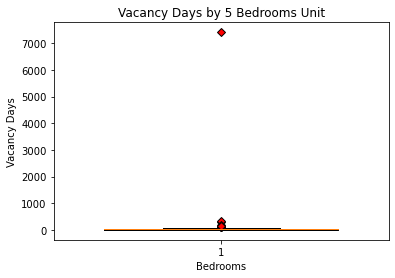

In [32]:
# Generate a box plot of the 5 Bed Detached House Vacancy Days
#Variable to change the colour of the potential outlier in boxplot
red_diamond = dict(markerfacecolor='r', marker='D')
# Generate a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Vacancy Days by 5 Bedrooms Unit')
ax1.set_ylabel('Vacancy Days')
ax1.set_xlabel('Bedrooms')
ax1.boxplot(five_bed_detached_vdays, flierprops=red_diamond, widths = .7, vert=True)
plt.show()

In [33]:
#Drop top 3 outliers index 6859, 7031, 5866
new_df = df.drop([6859, 7031, 5866])
#Group by bedroom
rooms_groupby = new_df.groupby(by='Bedrooms',as_index=False)['TotalVAC'].mean()
new_df.head()


,Unnamed: 0,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


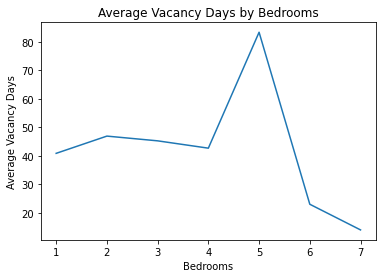

In [34]:
#Plotting
plt.plot(rooms_groupby['Bedrooms'], rooms_groupby['TotalVAC'])
plt.xlabel('Bedrooms')
plt.ylabel('Average Vacancy Days')
plt.title('Average Vacancy Days by Bedrooms')
plt.show()

In [35]:
rooms_groupby.head()

,Bedrooms,TotalVAC
0,1,40.846791
1,2,46.891626
2,3,45.230958
3,4,42.663354
4,5,83.305882


In [36]:
#Read Covid csv
covid_df = pd.read_csv('raw_data\opendata_qld_covidcase_loc.csv')
covid_df.head()
#Create a new columns for year and month
#Convert date string to year and month
Months = []
date_splited = []
dates = pd.Series(covid_df['NOTIFICATION_DATE'])
for date in dates:
    if '/' in date:
        date_splited = date.split('/')
        Months.append(f'{date_splited[2]}-{date_splited[1]}')
    elif '-' in date:
        date_splited = date.split('-')
        Months.append(date_splited[0].strip())
    else:
        Months.append(date)

covid_df['Month'] = Months
covid_df.head()

,NOTIFICATION_DATE,HHS,POSTCODE,LGA_NAME,SOURCE_INFECTION,SA2_CODE,SA2_REGION,Month
0,28/01/2020,GOLD COAST,NaN,NaN,Overseas Acquired,NaN,NaN,2020-01
1,30/01/2020,GOLD COAST,NaN,NaN,Overseas Acquired,NaN,NaN,2020-01
2,4/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02
3,4/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02
4,6/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02


In [37]:
#Group by month
covid_groupby = covid_df.groupby(by='Month',as_index=False)['NOTIFICATION_DATE'].count()
covid_groupby = covid_groupby.rename(columns={'NOTIFICATION_DATE':'Covid Cases'})
covid_groupby.head(20)

,Month,Covid Cases
0,2020-01,2
1,2020-02,7
2,2020-03,816
3,2020-04,211
4,2020-05,28
5,2020-06,8
6,2020-07,20
7,2020-08,39
8,2020-09,33
9,2020-10,14


In [38]:
#months_groupby.merge(covid_groupby, left_on='lkey', right_on='rkey')
merged_df = pd.merge(months_groupby, covid_groupby, on = "Month", how = "left")
merged_df.tail(20)

,Month,VUDays,VTDays,TotalVAC,Vacancy Count,Covid Cases
28,2019-11,21.508137,23.710669,45.218807,553,NaN
29,2019-12,25.105660,20.450943,45.556604,530,NaN
30,2020-01,29.302326,27.116279,56.418605,516,2.0
31,2020-02,26.807757,27.367622,54.175379,593,7.0
32,2020-03,26.580451,30.795489,57.375940,665,816.0
33,2020-04,20.358372,34.405321,54.763693,639,211.0
34,2020-05,23.123680,31.828054,54.951735,663,28.0
35,2020-06,24.961194,35.997015,60.958209,670,8.0
36,2020-07,9.868902,16.814024,26.682927,656,20.0
37,2020-08,9.246296,19.781481,29.027778,540,39.0


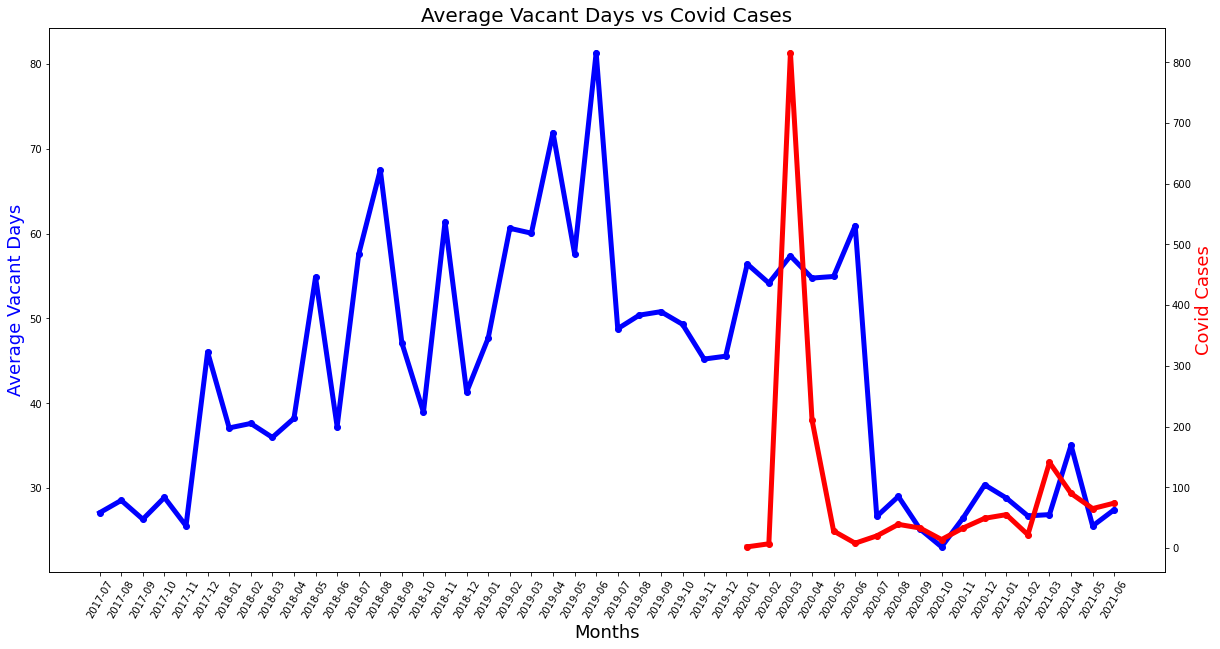

In [41]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 10])

# Plotting the firts line with ax axes
ax.plot(merged_df['Month'],
        merged_df['TotalVAC'],
        color='b', linewidth=5, marker='o')
plt.xticks(rotation=60)
ax.set_xlabel('Months', fontsize=18)
ax.set_ylabel('Average Vacant Days',  color='blue', fontsize=18)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(merged_df['Month'],
         merged_df['Covid Cases'],
         color='red', linewidth=5, marker='o')

ax2.set_ylabel('Covid Cases', color='red', fontsize=18)
plt.title('Average Vacant Days vs Covid Cases', fontsize=20)

plt.show()